## PlayTennis Prediction Project

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = [[1, 1, 1, 0, 0], 
        [1, 1, 1, 1, 0],
        [2, 1, 1, 0, 1],
        [3, 2, 1, 0, 1],
        [3, 3, 2, 0, 1],
        [3, 3, 2, 1, 0],
        [2, 3, 2, 1, 1],
        [1, 2, 1, 0, 0],
        [1, 3, 2, 0, 1],
        [3, 2, 2, 0, 1],
        [1, 2, 2, 1, 1],
        [2, 2, 1, 1, 1],
        [2, 1, 2, 0, 1],
        [3, 2, 1, 0, 1]]

dataframe = pd.DataFrame(data, columns=['Outlook', 'Temperature', 'Humidity', 'Windy', 'PlayTennis'])

In [8]:
# Outlook: 1=Sunny, 2=Overcast, 3=Rainy
# Temperature: 1=Hot, 2=Mild, 3=Cool
# Humidity: 1=High, 2=Normal
# Windy: 1=True, 0=False
# PlayTennis: 1=True, 0=False
dataframe

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,1,1,1,0,0
1,1,1,1,1,0
2,2,1,1,0,1
3,3,2,1,0,1
4,3,3,2,0,1
5,3,3,2,1,0
6,2,3,2,1,1
7,1,2,1,0,0
8,1,3,2,0,1
9,3,2,2,0,1


In [9]:
dataframe.shape

(14, 5)

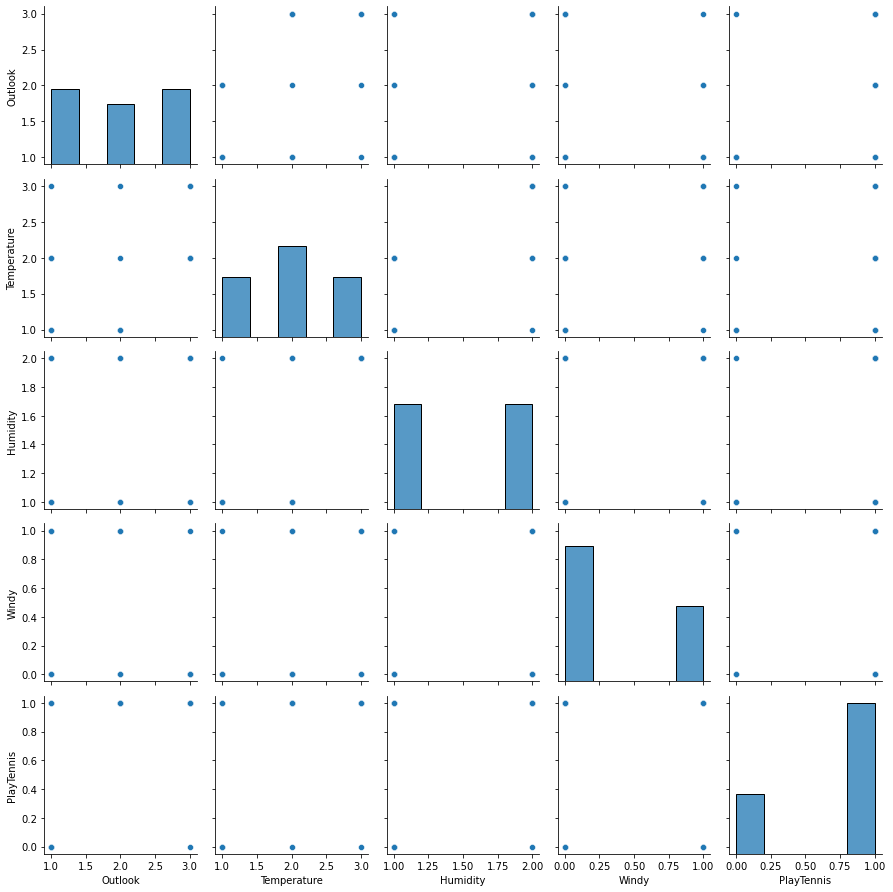

In [10]:
sns.pairplot(dataframe, height=2.5)
plt.tight_layout()

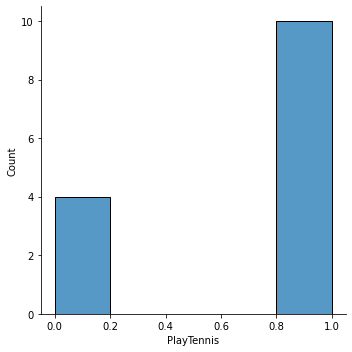

In [11]:
sns.displot(dataframe["PlayTennis"])

# Model Building

In [12]:
from sklearn.model_selection import train_test_split

x = dataframe.drop("PlayTennis", axis=1)
y = dataframe["PlayTennis"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 4)
(3, 4)
(11,)
(3,)


In [13]:
x_test

,Outlook,Temperature,Humidity,Windy
9,3,2,2,0
11,2,2,1,1
0,1,1,1,0


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

for yt in y_test:
    print("Actual value: ", yt)

for p in predictions:
    print("Model Predicted Value: ", round(p))

Actual value:  1
Actual value:  1
Actual value:  0
Model Predicted Value:  1
Model Predicted Value:  0
Model Predicted Value:  1


# Test with other data

In [15]:
myTests = [[3, 2, 1, 1], 
        [2, 2, 1, 1],
        [3, 1, 2, 0],
        [1, 2, 2, 0],
        [1, 1, 2, 0],
        [2, 2, 2, 0],
        [2, 1, 1, 1]]

myDFTests = pd.DataFrame(myTests, columns=["Outlook", "Temperature", "Humidity", "Windy"])

In [18]:
myDFTests

,Outlook,Temperature,Humidity,Windy
0,3,2,1,1
1,2,2,1,1
2,3,1,2,0
3,1,2,2,0
4,1,1,2,0
5,2,2,2,0
6,2,1,1,1


In [19]:
predictions2 = lr.predict(myDFTests)

for p in predictions2:
    print("Model Predicted Value: ", round(p))

Model Predicted Value:  0
Model Predicted Value:  0
Model Predicted Value:  1
Model Predicted Value:  1
Model Predicted Value:  1
Model Predicted Value:  1
Model Predicted Value:  0
